<a href="https://colab.research.google.com/github/ALLEXGG/PAS_MP-/blob/main/PAS_MP1(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
base_dir = '/content/drive/MyDrive/PAS_MP-1/Data/'
!ls "/content/drive/MyDrive/PAS_MP-1/Data/"

bahan  train


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from google.colab import files

In [ ]:
base_dir = '/content/drive/MyDrive/PAS_MP-1/Data'
train_dir = os.path.join(base_dir, 'train')
bahan_dir = os.path.join(base_dir, 'bahan')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    bahan_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 300 images belonging to 3 classes.
Found 301 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 kelas output
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)


Epoch 1/20
10/10 - 29s - 3s/step - accuracy: 0.6333 - loss: 1.2420 - val_accuracy: 0.7209 - val_loss: 0.6979
Epoch 2/20
10/10 - 37s - 4s/step - accuracy: 0.7700 - loss: 0.7216 - val_accuracy: 0.8472 - val_loss: 0.4318
Epoch 3/20
10/10 - 21s - 2s/step - accuracy: 0.9133 - loss: 0.3029 - val_accuracy: 0.9336 - val_loss: 0.2049
Epoch 4/20
10/10 - 23s - 2s/step - accuracy: 0.9300 - loss: 0.2174 - val_accuracy: 0.9269 - val_loss: 0.2393
Epoch 5/20
10/10 - 24s - 2s/step - accuracy: 0.9233 - loss: 0.1922 - val_accuracy: 0.9701 - val_loss: 0.0891
Epoch 6/20
10/10 - 38s - 4s/step - accuracy: 0.9467 - loss: 0.1357 - val_accuracy: 0.9635 - val_loss: 0.1060
Epoch 7/20
10/10 - 44s - 4s/step - accuracy: 0.9600 - loss: 0.1114 - val_accuracy: 0.9668 - val_loss: 0.0962
Epoch 8/20
10/10 - 21s - 2s/step - accuracy: 0.9667 - loss: 0.0959 - val_accuracy: 0.9635 - val_loss: 0.1155
Epoch 9/20
10/10 - 23s - 2s/step - accuracy: 0.9767 - loss: 0.0755 - val_accuracy: 0.9767 - val_loss: 0.0845
Epoch 10/20
10/10 -

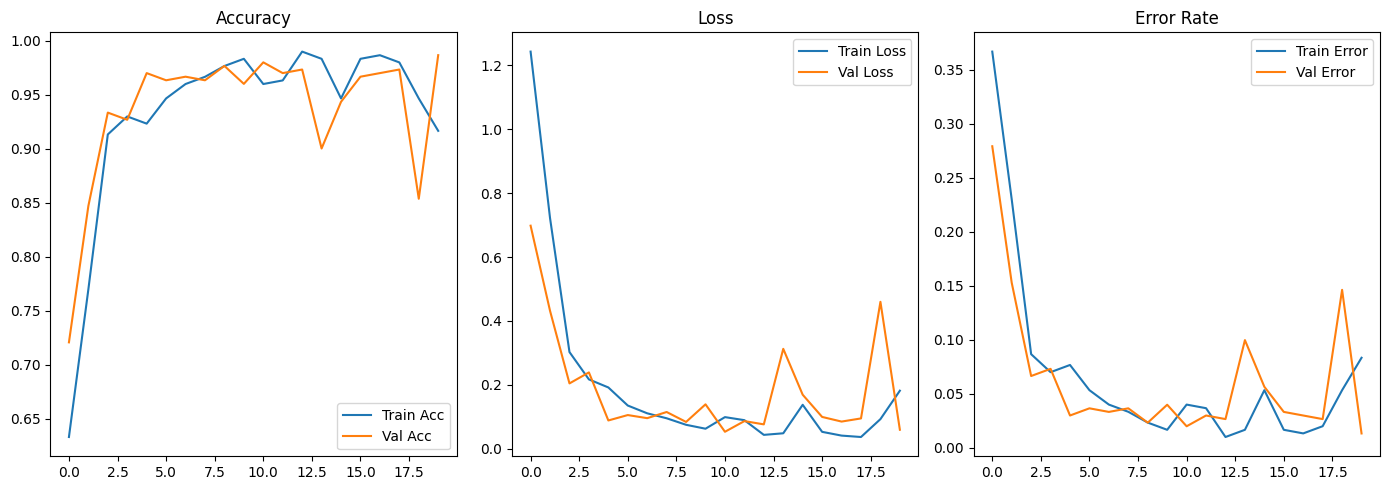

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
error = [1 - a for a in acc]
val_error = [1 - va for va in val_acc]
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, label='Train Acc')
plt.plot(epochs_range, val_acc, label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs_range, error, label='Train Error')
plt.plot(epochs_range, val_error, label='Val Error')
plt.title('Error Rate')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    img = load_img(fn, target_size=(100, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Jangan lupa normalisasi

    pred = model.predict(x)
    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(pred)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()